In [1]:
# Dependencies
import gempy as gp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from gempy.assets import topology as tp

import warnings

warnings.filterwarnings("ignore")

# Creating model object and indicating path
data_path = "../../../../input/BES/interpreted_seismics_2/GemPy 2.3.1/"
geo_model = gp.create_model("BES_model_seismic_v1")

No module named 'osgeo'


In [2]:
# Loading model, the extension, the resolution and importing the data
gp.init_data(
    geo_model,
    extent=[425000, 480000, 7780000, 7800000, -7000, -2000],
    resolution=[50, 50, 50],
    path_i=data_path + "surface_points_1000m.csv",
    path_o=data_path + "orientations_points_1000m.csv",
)

Active grids: ['regular']


BES_model_seismic_v1  2024-02-28 14:56

In [3]:
# Ordenando as surfaces (Estratigrafia (topo para base)) 3
gp.map_stack_to_surfaces(
    geo_model,
    {
        "Strat": ("MAASTRICHTIANO"),
        "Strat_2": ("CENOMANIANO"),
        "Basement": ("basement",),
    },
)

,surface,series,order_surfaces,color,id
0,MAASTRICHTIANO,Strat,1,#015482,1
1,CENOMANIANO,Strat_2,1,#9f0052,2
2,basement,Basement,1,#ffbe00,3


In [4]:
#geo_model.set_default_orientation()

In [5]:
geo_model.get_data()

X            Y        Z    smooth         surface   
surface_points 0  431215.581  7798428.010 -2784.95  0.000002  MAASTRICHTIANO  \
               1  432015.617  7798428.052 -2833.81  0.000002  MAASTRICHTIANO   
               2  433015.662  7798428.105 -2896.70  0.000002  MAASTRICHTIANO   
               3  434015.706  7798428.158 -2958.58  0.000002  MAASTRICHTIANO   
               4  435015.751  7798428.211 -3020.15  0.000002  MAASTRICHTIANO   
...                      ...          ...      ...       ...             ...   
orientations   1  455016.645  7798429.272 -3883.94  0.010000  MAASTRICHTIANO   
               2  470017.315  7798430.068 -4498.95  0.010000  MAASTRICHTIANO   
               3  444003.822  7795228.619 -4736.23  0.010000     CENOMANIANO   
               4  455004.314  7795229.203 -5193.61  0.010000     CENOMANIANO   
               5  470004.984  7795229.999 -5884.29  0.010000     CENOMANIANO   

                           G_x           G_y  G_z  
surface_points 0           NaN           NaN  NaN  
               1           NaN           NaN  NaN  
               2           NaN           NaN  NaN  
               3           NaN           NaN  NaN  
               4           NaN           NaN  NaN  
...                        ...           ...  ...  
orientations   1  1.000000e-12  1.000000e-12  1.0  
               2  1.000000e-12  1.000000e-12  1.0  
               3  1.000000e-12  1.000000e-12  1.0  
               4  1.000000e-12  1.000000e-12  1.0  
               5  1.000000e-12  1.000000e-12  1.0  

[1117 rows x 8 columns]

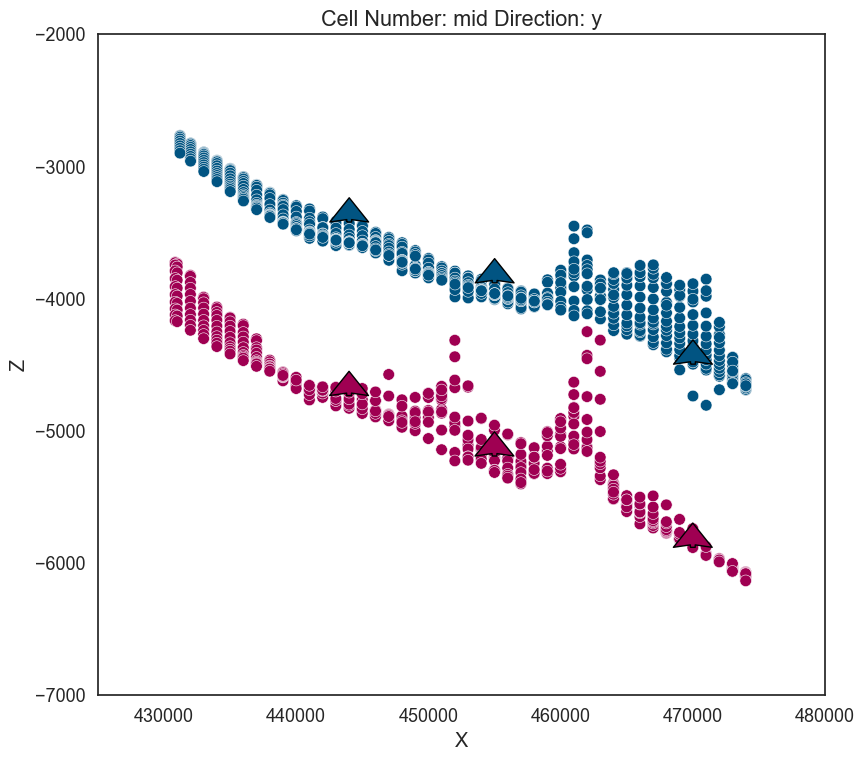

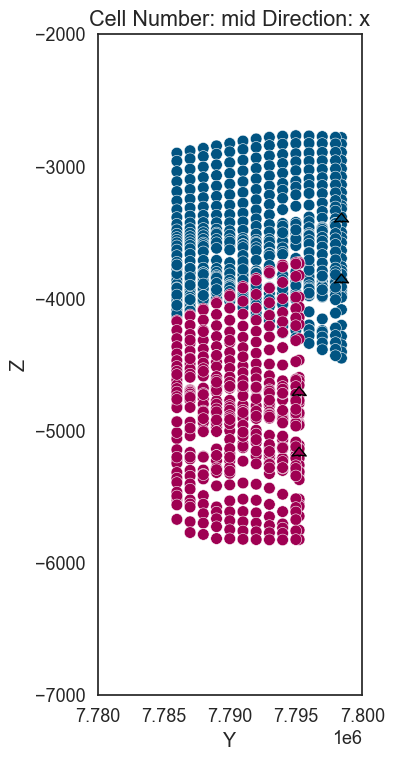

In [6]:
# Seção transversal do modelo
gp.plot_2d(
    geo_model, direction="y", show_data=True, show_lith=True, ve=10, legend=False
)
gp.plot_2d(
    geo_model, direction="x", show_data=True, show_lith=True, ve=10, legend=False
)
# gp.plot_2d(geo_model, direction="z", show_data=True, show_lith=True, ve=1, legend=False)

# Ver os dados em 3D
gpv = gp.plot_3d(
    geo_model,
    plotter_type="background",
    show_data=True,
    ve=2,
)

In [8]:
# Interpolating and computing the model

gp.set_interpolator(
    geo_model,
    #output=["geology"],
    compile_theano=True,
    theano_optimizer="fast_run",  # fast_compile, fast_run
    dtype="float64",  # for model stability
)

sol = gp.compute_model(geo_model, compute_mesh=True)

Setting kriging parameters to their default values.
Compiling aesara function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                           values
range               58736.700622
$C_o$            82142857.142857
drift equations        [3, 3, 3]


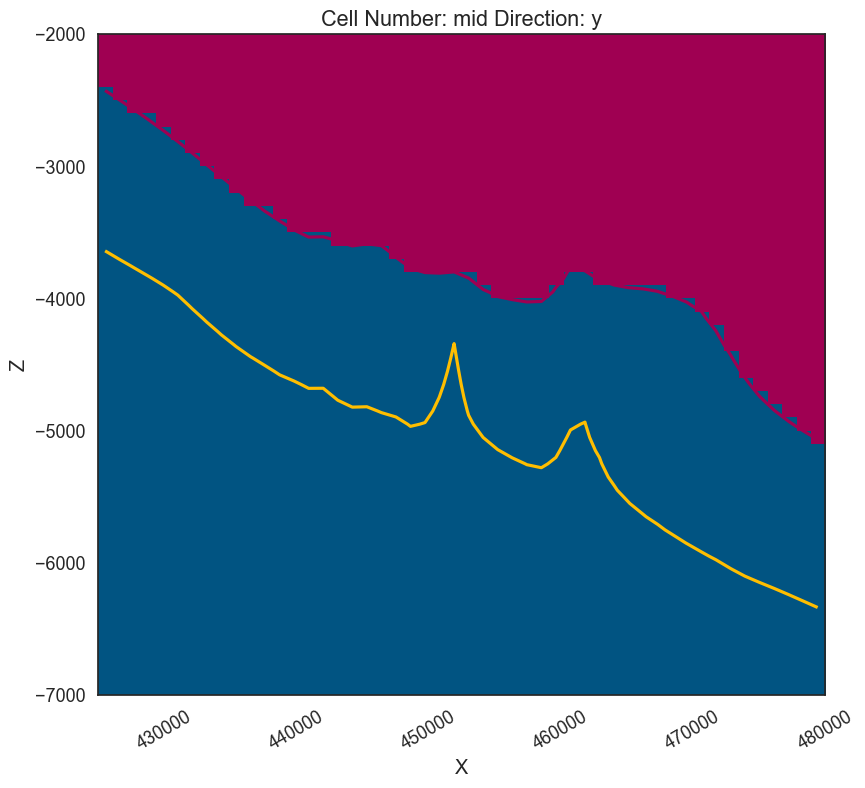

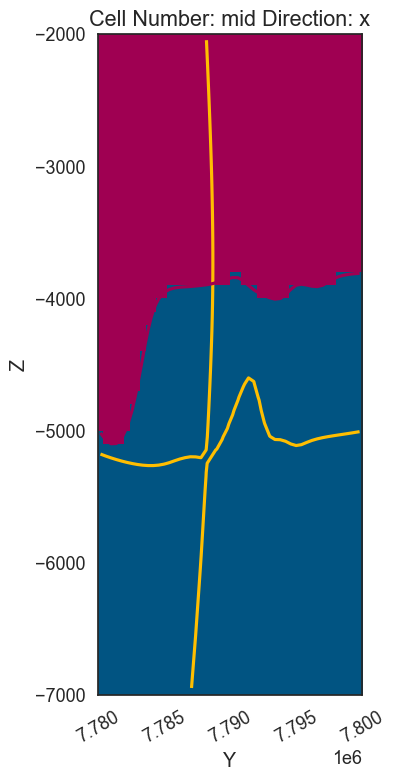

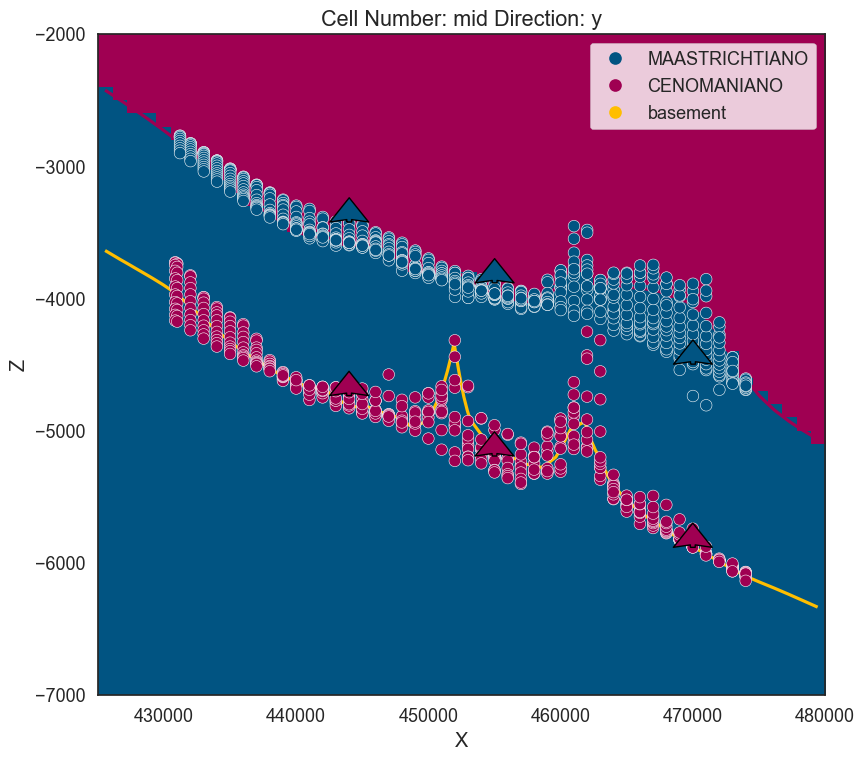

In [9]:
# Ploting 2D and 3D

# Seção transversal do modelo
gp.plot_2d(
    geo_model,
    direction="y",
    show_data=False,
    show_lith=True,
    ve=10,
)
gp.plot_2d(
    geo_model,
    direction="x",
    show_data=False,
    show_lith=True,
    ve=10,
    legend=True,
)

gp.plot_2d(
    geo_model,
    direction="y",
    show_data=True,
    show_lith=True,
    ve=10,
)

In [10]:
gpv = gp.plot_3d(geo_model, image=False, plotter_type="background", show_data=False, ve=5)

In [ ]:
geo_model.solutions

In [ ]:
# Salvar o modelo gerado em zip (contem todos os files relevantes para refazer o modelo)
gp.save_model(
    geo_model,
    compress=False,
    solution=True,
)